In [1]:
#usual procedure...
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from nuflux import detgeo as dg
import pandas as pd
import gc
import pickle
import matplotlib.ticker as ticker
import nuflux.detector_geometries.useful_data as ud
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator

In [2]:
sim = dg.SimulateDecays(param='mucol s2', N_evals = 1e7)

Succesfully simulated decays:
IMCC-II parameter set with 1.000e+07 evaluations .
1.863e+07 MC generations; took 2.69e+02 s.


In [3]:
colors = [
    (1, 1, 1),    # white
    (1, 0.4, 0.7), # pink
    (0, 0, 1),    # blue
    (0, 1, 0),    # green
    (1, 1, 0),    # yellow
    (1, 0, 0),    # red
    (0, 0, 0)     # black
]

# Create custom colormap
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

In [4]:
parameter  = ud.mucol_s2
#to see the fraction that decay in straight segment
m = ((sim.p[:,2] % parameter['C']) < 10000)
#weigh per YEAR accordingly
f = np.sum(sim.weights[m]) / np.sum(sim.weights) * parameter['Nmu']
w = sim.weights * f

In [5]:
#use ALL the sim'ed decays (that's why we weighed appropriately)
sim.p[:,2] = sim.p[:,2] % 10000
# need to find intersection point with z = 250 (nue) (200m from IP, here at z = 50 m)
ts = (25000 - sim.p[:,2])/sim.pnue[:,3]
new_p_nue = sim.p + ts[:,np.newaxis] * sim.pnue[:,1:]

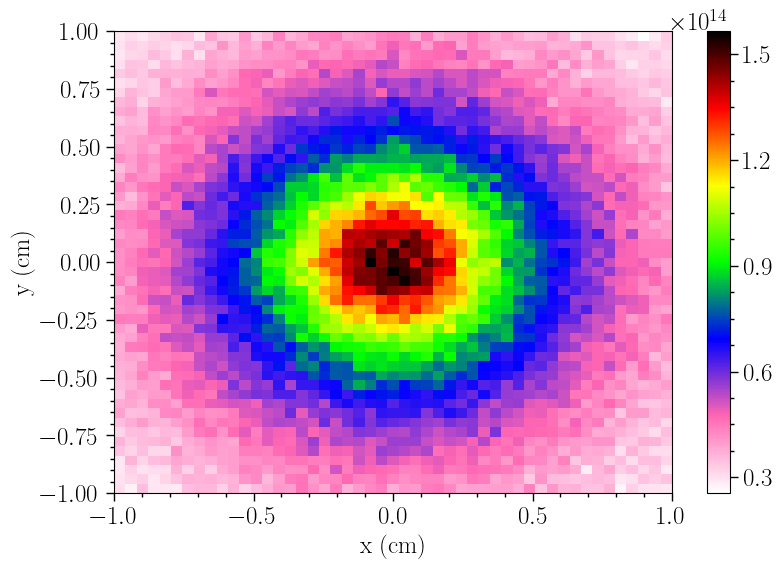

In [6]:
plt.style.use('./paper_style.txt')
plt.figure(figsize = (9,6))
s = 1
n = 50
bins = (np.linspace(-s, s, n), np.linspace(-s,s, n))
hist, xedges, yedges, image = plt.hist2d(new_p_nue[:,0], new_p_nue[:,1], weights = w, bins = bins, cmap = cmap)
cbar = plt.colorbar(image)
cbar.locator = MaxNLocator(nbins=5)  # Here you control the number of separations
cbar.update_ticks()
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()